In [461]:
import qutip as q
import numpy as np
import matplotlib.pyplot as plt

from NVcenter import *
from NVcenter.mitigation import *
plt.style.use('NVcenter-default')

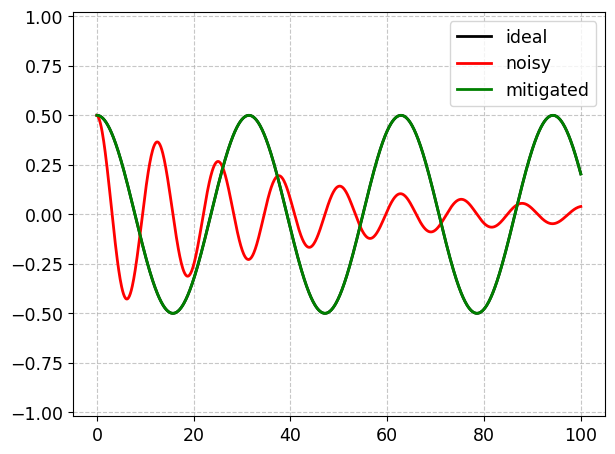

In [132]:
# error mitigation of a combined relaxation and pure dephasing channel with unitary dynamics 
T1 = 100
T2_star = 50
T2 = (1/(2*T1) + 1/T2_star)**(-1)
timesteps = 1000

H_ideal = 0.5 * 0.2 * q.sigmaz()
omega_noise = 0.3
H_noisy = 0.5 * omega_noise * q.sigmaz()
H = H_ideal + H_noisy
rho0 = 0.5 * ( q.ket2dm(q.basis(2,0) + q.basis(2,1)) )
t_list = np.linspace(0, 100, timesteps)
c_ops = [np.sqrt(1/T1) * q.sigmap(), np.sqrt(1/(2*T2_star)) * q.sigmaz()]

rho_list_noisy = q.mesolve(H, rho0, t_list, c_ops).states
rho_list_ideal = q.mesolve(H_ideal, rho0, t_list, []).states

rho_list_mitigated = []
for i in range(timesteps):

    rho_noisy = rho_list_noisy[i]
    t = t_list[i]
    theta = np.arccos(np.exp(-t/(2*T1)))
    
    p1 = 0.5 * np.exp(t/T1) * 0.5 * ( np.exp(t/T2_star) + 1)
    p2 = 0.5 * np.exp(t/T1) * 0.5 * ( np.exp(t/T2_star) - 1)
    p3 = 0.5 * np.exp(t/T1) * 0.5 * ( np.exp(t/T2_star) + 1)
    p4 = 0.5 * np.exp(t/T1) * 0.5 * ( np.exp(t/T2_star) - 1)
    p5 = np.exp(t/T1) - 1

    U_noise = (-1j*H_noisy*t).expm() # q.gates.rz(omega_noise * t) 
    U1 = q.gates.rz(-theta)
    U2 = U1 * q.sigmaz()
    U3 = q.gates.rz(theta)
    U4 = U3 * q.sigmaz()
    a = rho_noisy[0,0] + rho_noisy[1,1]
    
    rho_mitigated = (p1 * U1 * rho_noisy * U1.dag() 
                     - p2 * U2 * rho_noisy * U2.dag() 
                     + p3 * U3 * rho_noisy * U3.dag() 
                     - p4 * U4 * rho_noisy * U4.dag() 
                     - p5 * q.Qobj([[a,0], [0,0]])
                    )
    rho_mitigated = U_noise.dag() * rho_mitigated * U_noise
    rho_list_mitigated.append(rho_mitigated)



plt.plot(t_list, [dm[0,1].real for dm in rho_list_ideal], 'k', label='ideal')
plt.plot(t_list, [dm[0,1].real for dm in rho_list_noisy], 'r', label='noisy')
plt.plot(t_list, [dm[0,1].real for dm in rho_list_mitigated], 'g', label='mitigated')
plt.ylim(-1.02, 1.02)
plt.legend()
plt.show()

In [ ]:
# error mitigation of a combined relaxation and pure dephasing channel with unitary dynamics 
T1 = 100
T2_star = 50
T2 = (1/(2*T1) + 1/T2_star)**(-1)
timesteps = 1000

H_ideal = 0.5 * 0.2 * q.sigmaz()
omega_noise = 0.3
H_noisy = 0.5 * omega_noise * q.sigmax()
H = H_ideal + H_noisy
rho0 = 0.5 * ( q.ket2dm(q.basis(2,0) + q.basis(2,1)) )
t_list = np.linspace(0, 100, timesteps)
c_ops = [np.sqrt(1/T1) * q.sigmap(), np.sqrt(1/(2*T2_star)) * q.sigmaz()]

rho_list_noisy = q.mesolve(H, rho0, t_list, c_ops).states
rho_list_ideal = q.mesolve(H_ideal, rho0, t_list, []).states

rho_list_mitigated = []
for i in range(timesteps):

    rho_noisy = rho_list_noisy[i]
    t = t_list[i]
    theta = np.arccos(np.exp(-t/(2*T1)))
    
    p1 = 0.5 * np.exp(t/T1) * 0.5 * ( np.exp(t/T2_star) + 1)
    p2 = 0.5 * np.exp(t/T1) * 0.5 * ( np.exp(t/T2_star) - 1)
    p3 = 0.5 * np.exp(t/T1) * 0.5 * ( np.exp(t/T2_star) + 1)
    p4 = 0.5 * np.exp(t/T1) * 0.5 * ( np.exp(t/T2_star) - 1)
    p5 = np.exp(t/T1) - 1

    U_noise = (-1j*H_noisy*t).expm() # q.gates.rz(omega_noise * t) 
    U1 = q.gates.rz(-theta)
    U2 = U1 * q.sigmaz()
    U3 = q.gates.rz(theta)
    U4 = U3 * q.sigmaz()
    a = rho_noisy[0,0] + rho_noisy[1,1]
    
    rho_mitigated = (p1 * U1 * rho_noisy * U1.dag() 
                     - p2 * U2 * rho_noisy * U2.dag() 
                     + p3 * U3 * rho_noisy * U3.dag() 
                     - p4 * U4 * rho_noisy * U4.dag() 
                     - p5 * q.Qobj([[a,0], [0,0]])
                    )
    rho_mitigated = U_noise.dag() * rho_mitigated * U_noise
    rho_list_mitigated.append(rho_mitigated)

plt.plot(t_list, [dm[0,1].real for dm in rho_list_ideal], 'k', label='ideal')
plt.plot(t_list, [dm[0,1].real for dm in rho_list_noisy], 'r', label='noisy')
plt.plot(t_list, [dm[0,1].real for dm in rho_list_mitigated], 'g', label='mitigated')
plt.ylim(-1.02, 1.02)
plt.legend()
plt.show()

# AC magnetic field sensing

In [ ]:
# sensing narrowband ac magnetic fields 
# T2 time is onoe or two orders of magnitude bigger than T2_star
# Hahn/ spin echo: Ramsey protocol with one dynamical decoupling pulse
# CPMG-n (Carr-Purcell-Meiboom-Gill) families well-known from NMR
# XY families
# T1 time dominated by two-phonon Raman processes
# pulse sequence is phase locked to the magnetic field

Ramsey period: 56.04 us
AC field period:  1.0 us


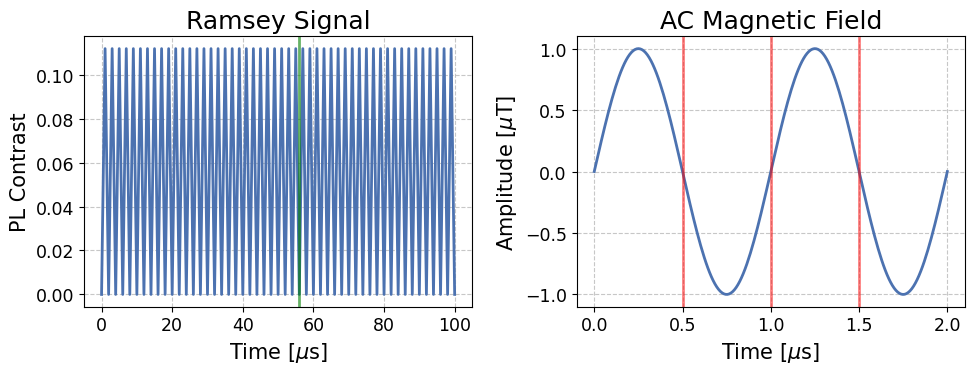

In [483]:
def H_coeff(t, args):
    Bz, T, phi = args["Bz"], args["T"], args["phi"]
    omega = 2*np.pi / T
    return np.cos(omega * t + phi) * Bz * CONST['gamma_e'] / 2

def step(rho, H, c_ops, args):
    times = np.linspace(0, T/2, 100)
    result = q.mesolve(H, rho, times, c_ops=c_ops, args=args).states
    rho = result[-1]
    
    rho = X * rho * X.dag()
    
    times = np.linspace(T/2, T, 100)
    result = q.mesolve(H, rho, times, c_ops=c_ops, args=args).states
    rho = result[-1]
    return rho

# time evolution
def evolve_rho(num_periods, Bz, T):
    rho = q.basis(2, 0).proj()
    c_ops = [] # [np.sqrt(1/T1) * q.sigmap()]
    H = [0 * q.sigmaz(), [q.sigmaz(), H_coeff]]
    args = {"Bz": Bz, "T": T_ac, "phi": -np.pi/2}
    
    rho = hada_X * rho * hada_X.dag()
    for i in range(num_periods):
        if i!=0: 
            rh0 = X * rho * X.dag()
        rho = step(rho, H, c_ops, args) 
    rho = hada_Y * rho * hada_Y.dag()
    return rho

Bz = 1e-6 # amplitude in T
omega_ramsey = 2 * CONST['gamma_e'] * Bz / np.pi
T_ramsey = abs(2*np.pi/omega_ramsey)
print('Ramsey period:', np.round(T_ramsey*1e6, 2), 'us')

T_ac = 1e-6
omega_ac = 2*np.pi/T_ac
print('AC field period: ', np.round(T*1e6, 2), 'us')

# plotting
fig, ax = plt.subplots(1,2,figsize=(10,4))

# first plot
total_periods = 100
total_time = total_periods * T_ac
times = np.linspace(0, total_time, total_periods+1)
rho_list = [evolve_rho(num_periods, Bz, T_ac) for num_periods in range(total_periods+1)]
p00 = np.array([rho[0,0] for rho in rho_list])

ax[0].plot(times*1e6, 2*p00-1)
ax[0].axvline(x=T_ramsey *1e6, color='g', alpha=0.6)
ax[0].set_title('Ramsey Signal')
ax[0].set_xlabel(r'Time [$\mu$s]')
ax[0].set_ylabel('PL Contrast')

# second plot
total_periods = 2
total_time = total_periods * T_ac
times = np.linspace(0, total_time, 200)
B_ac = Bz * 1e6 * np.cos(omega_ac*times - np.pi/2)

ax[1].plot(times*1e6, B_ac)
for k in range(1, 2*total_periods):
    ax[1].axvline(x=k*T_ac/2*1e6, color='r', alpha=0.5)
ax[1].set_title('AC Magnetic Field')
ax[1].set_xlabel(r'Time [$\mu$s]')
ax[1].set_ylabel(r'Amplitude [$\mu$T]')

plt.show()

Ramsey period: 56.04 us
AC field period:  1.0 us


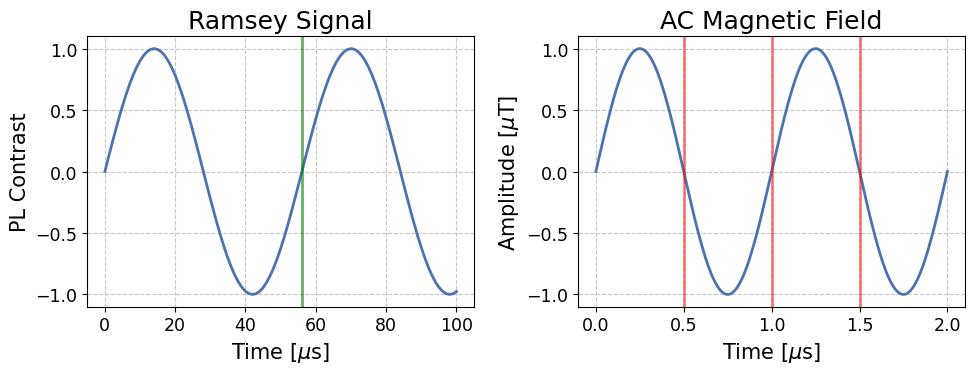

In [440]:
def get_U_free(Bz, T, t0=0, t1=0, phi=-np.pi/2):
    # eps = (CONST['D_gs'] + CONST['gamma_e'] * 500e-4)/2
    eps = 0
    # Hamiltonian: H(t) = 0.5 * (eps + CONST['gamma_e'] * Bz * cos(omega * t + phi)) * sigma_z
    # cosinus: phi=0, sinus: phi=-np.pi/2
    # integration from 0 to t
    omega = 2*np.pi/T
    phi = (
        0.5 * eps * t + 
        (0.5 * Bz * CONST['gamma_e'] / omega) * ( np.sin(omega * t1 + phi) - np.sin(omega * t0 + phi) )
          )
    U = (-1j * phi * q.sigmaz()).expm()
    return U 

def U_rot(alpha, theta, phi):
    nx = np.sin(theta) * np.cos(phi)
    ny = np.sin(theta) * np.sin(phi)
    nz = np.cos(theta)
    n_dot_sigma = nx * q.sigmax() + ny * q.sigmay() + nz * q.sigmaz()
    return (-1j * alpha / 2 * n_dot_sigma).expm()

X = 1j * U_rot(np.pi, np.pi/2, 0)
hada_X = 1j * U_rot(np.pi, np.pi/4, 0)
Y = 1j * U_rot(np.pi, np.pi/2, np.pi/2)
hada_Y = 1j * U_rot(np.pi, np.pi/4, np.pi/2)

def evolve_rho(num_periods, Bz, T):
    
    U_free_before = get_U_free(Bz, T, t0=0, t1=T/2)
    U_free_after = get_U_free(Bz, T, t0=T/2, t1=T)
    U = U_free_after * X * U_free_before 
    
    psi = hada_X * q.basis(2,0)
    for i in range(num_periods):
        if i==0:
            psi = U * psi
        else: 
            psi = U * X * psi
    psi = hada_Y * psi
    return psi * psi.dag()

Bz = 1e-6 # amplitude in T
omega_ramsey = 2 * CONST['gamma_e'] * Bz / np.pi
T_ramsey = abs(2*np.pi/omega_ramsey)
print('Ramsey period:', np.round(T_ramsey*1e6, 2), 'us')

T_ac = 1e-6
omega_ac = 2*np.pi/T_ac
print('AC field period: ', np.round(T*1e6, 2), 'us')

# plotting
fig, ax = plt.subplots(1,2,figsize=(10,4))

# first plot
total_periods = 100
total_time = total_periods * T_ac
times = np.linspace(0, total_time, total_periods+1)
rho_list = [evolve_rho(num_periods, Bz, T_ac) for num_periods in range(total_periods+1)]
p00 = np.array([rho[0,0] for rho in rho_list])

ax[0].plot(times*1e6, 2*p00-1)
ax[0].axvline(x=T_ramsey *1e6, color='g', alpha=0.6)
ax[0].set_title('Ramsey Signal')
ax[0].set_xlabel(r'Time [$\mu$s]')
ax[0].set_ylabel('PL Contrast')

# second plot
total_periods = 2
total_time = total_periods * T_ac
times = np.linspace(0, total_time, 200)
B_ac = Bz * 1e6 * np.cos(omega_ac*times - np.pi/2)

ax[1].plot(times*1e6, B_ac)
for k in range(1, 2*total_periods):
    ax[1].axvline(x=k*T_ac/2*1e6, color='r', alpha=0.5)
ax[1].set_title('AC Magnetic Field')
ax[1].set_xlabel(r'Time [$\mu$s]')
ax[1].set_ylabel(r'Amplitude [$\mu$T]')

plt.show()

Ramsey period: 56039.83 us
AC field period:  1.0 us


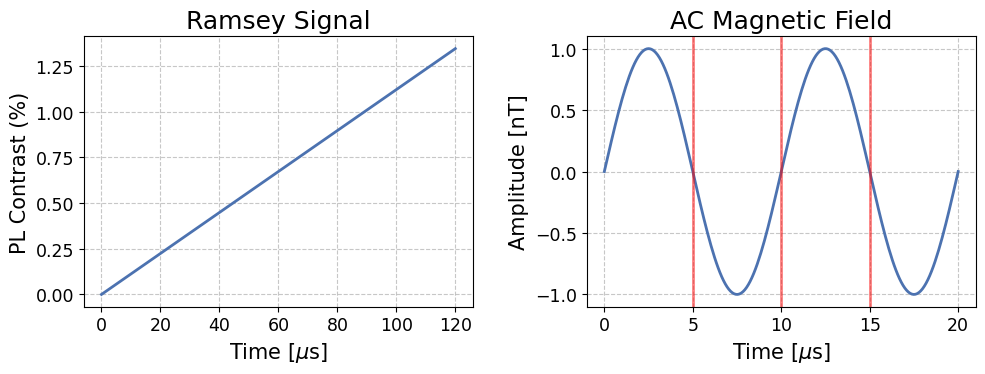

In [457]:
# XY8-3 sequence 

def get_U_free(Bz, T, t0=0, t1=0, phi=-np.pi/2):
    # eps = (CONST['D_gs'] + CONST['gamma_e'] * 500e-4)/2
    eps = 0
    # Hamiltonian: H(t) = 0.5 * (eps + CONST['gamma_e'] * Bz * cos(omega * t + phi)) * sigma_z
    # cosinus: phi=0, sinus: phi=-np.pi/2
    # integration from 0 to t
    omega = 2*np.pi/T
    phi = (
        0.5 * eps * t + 
        (0.5 * Bz * CONST['gamma_e'] / omega) * ( np.sin(omega * t1 + phi) - np.sin(omega * t0 + phi) )
          )
    U = (-1j * phi * q.sigmaz()).expm()
    return U 

def U_rot(alpha, theta, phi):
    nx = np.sin(theta) * np.cos(phi)
    ny = np.sin(theta) * np.sin(phi)
    nz = np.cos(theta)
    n_dot_sigma = nx * q.sigmax() + ny * q.sigmay() + nz * q.sigmaz()
    return (-1j * alpha / 2 * n_dot_sigma).expm()

X = 1j * U_rot(np.pi, np.pi/2, 0)
hada_X = 1j * U_rot(np.pi, np.pi/4, 0)
Y = 1j * U_rot(np.pi, np.pi/2, np.pi/2)
hada_Y = 1j * U_rot(np.pi, np.pi/4, np.pi/2)

def evolve_rho(num_periods, Bz, T):
    
    U_free_before = get_U_free(Bz, T, t0=0, t1=T/2)
    U_free_after = get_U_free(Bz, T, t0=T/2, t1=T)
    U = U_free_after * Y * U_free_before 
    
    psi = hada_X * q.basis(2,0)
    for i in range(num_periods):
        if i==0:
            psi = U * psi
        else: 
            psi = U * X * psi
    psi = hada_Y * psi
    return psi * psi.dag()

Bz = 1e-9 # amplitude in T
omega_ramsey = 2 * CONST['gamma_e'] * Bz / np.pi
T_ramsey = abs(2*np.pi/omega_ramsey)
print('Ramsey period:', np.round(T_ramsey*1e6, 2), 'us')

T_ac = 10e-6
omega_ac = 2*np.pi/T_ac
print('AC field period: ', np.round(T*1e6, 2), 'us')

# plotting
fig, ax = plt.subplots(1,2,figsize=(10,4))

# first plot
total_periods = 12
total_time = total_periods * T_ac
times = np.array([0, total_time])
rho_list = [evolve_rho(num_periods, Bz, T_ac) for num_periods in [0, total_periods]]
p00 = np.array([rho[0,0] for rho in rho_list])

ax[0].plot(times*1e6, (2*p00-1)*1e2)
# ax[0].axvline(x=T_ramsey *1e6, color='g', alpha=0.6)
ax[0].set_title('Ramsey Signal')
ax[0].set_xlabel(r'Time [$\mu$s]')
ax[0].set_ylabel('PL Contrast (%)')

# second plot
total_periods = 2
total_time = total_periods * T_ac
times = np.linspace(0, total_time, 200)
B_ac = Bz * 1e9 * np.cos(omega_ac*times - np.pi/2)

ax[1].plot(times*1e6, B_ac)
for k in range(1, 2*total_periods):
    ax[1].axvline(x=k*T_ac/2*1e6, color='r', alpha=0.5)
ax[1].set_title('AC Magnetic Field')
ax[1].set_xlabel(r'Time [$\mu$s]')
ax[1].set_ylabel(r'Amplitude [nT]')

plt.show()

# HEOM for phonons

In [155]:
from qutip.solver.heom import DrudeLorentzBath, DrudeLorentzPadeBath, BosonicBath

gamma = 10e12  # cut off frequency
lam = 1e9  # coupling strength
T = 300  # temperature
Q = q.sigmax()
Nk = 2

bath = DrudeLorentzBath(Q, lam, gamma, T, Nk)
bath = DrudeLorentzPadeBath(Q, lam, gamma, T, Nk)

def cot(x):
    return 1. / np.tan(x)

beta = 1. / T
ck_real = [lam * gamma / np.tan(gamma / (2 * T))]
ck_real.extend([
    (8 * lam * gamma * T * np.pi * k * T /
        ((2 * np.pi * k * T)**2 - gamma**2))
    for k in range(1, Nk + 1)
])
vk_real = [gamma]
vk_real.extend([2 * np.pi * k * T for k in range(1, Nk + 1)])

# C_imag expansion terms (this is the full expansion):
ck_imag = [lam * gamma * (-1.0)]
vk_imag = [gamma]

bath = BosonicBath(Q, ck_real, vk_real, ck_imag, vk_imag)

In [165]:
from qutip.solver.heom import HEOMSolver

eps = CONST['D_gs'] + CONST['gamma_e'] * 500e-4
H_sys = 0.5 * eps * q.sigmaz()
max_depth = 3
options = {"nsteps": 100_000}
rho0 = q.basis(2,0) * q.basis(2,0).dag()
tlist = np.linspace(0, 2e-9, 3)

P11p = basis(2,0) * basis(2,0).dag()
P22p = basis(2,1) * basis(2,1).dag()
P12p = basis(2,0) * basis(2,1).dag()
solver = HEOMSolver(H_sys, bath, max_depth=max_depth, options=options)

50.0%. Run time:   0.47s. Est. time left: 00:00:00:00
100.0%. Run time:   0.90s. Est. time left: 00:00:00:00
Total run time:   0.90s


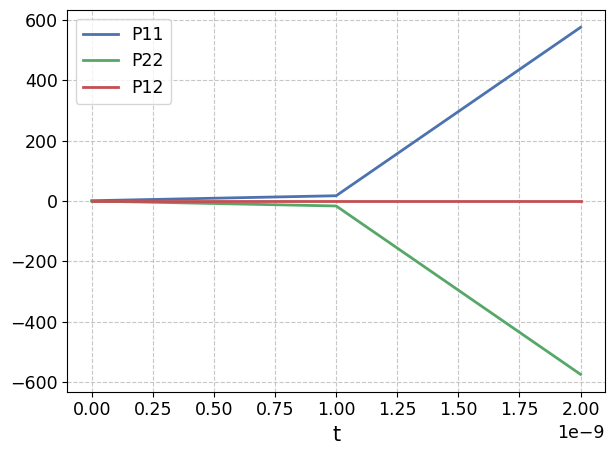

In [167]:
result = solver.run(rho0, tlist, e_ops={"11": P11p, "22": P22p, "12": P12p})

fig, ax = plt.subplots()
ax.plot(result.times, np.real(result.e_data["11"]), label="P11")
ax.plot(result.times, np.real(result.e_data["22"]), label="P22")
ax.plot(result.times, np.real(result.e_data["12"]), label="P12")
ax.set_xlabel(r't')
ax.legend()

In [ ]:
# 